# Pandas统计分析入门（2）
- 转载注明转自：https://github.com/liupengyuan/
- ## 二维数据统计分析(DataFrame基础)

---

In [181]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 二、二维数据统计分析(DataFrame基础)

- 数据的描述、分析、可视化展示、概括性度量、输入与输出
df：多维条形图，多维折线图，多层图

### 1. DataFrame对象及数据展示

- DataFrame是pandas最重要最基础的数据对象之一，可用来表示数据表
- 如果将Series视为表格中的一列，则DataFrame可以视为表中多列，或者是具有相同index的多个Series
- 如果将Series视为向量(带索引)，则DataFrame即可视为矩阵(带索引)。
- 本小节仍将以一个词频统计结果作为实例，进行介绍。
- 教程中的各个代码段，请自行建立新的python程序，依次键入并顺序执行，观察执行结果。

In [182]:
words_freq = np.array([200,300,400,350,390,600,900,400,300,120])
freq_dict = {'boy':words_freq,'girl':words_freq*2,'children':words_freq+100, 'child': words_freq+300}
total_words_freq = [12345000,23456000,22333000,45632000,11144000,65433000,44444000,55555000,34522000,55566000]
years = pd.date_range('2006', periods=10, freq='A')

In [183]:
df = DataFrame(freq_dict)
df

,boy,child,children,girl
0,200,500,300,400
1,300,600,400,600
2,400,700,500,800
3,350,650,450,700
4,390,690,490,780
5,600,900,700,1200
6,900,1200,1000,1800
7,400,700,500,800
8,300,600,400,600
9,120,420,220,240


- 利用dict创建一个DataFrame对象，其index默认为从0开始的整数

In [184]:
df = DataFrame(freq_dict, index = years)
df

,boy,child,children,girl
2006-12-31,200,500,300,400
2007-12-31,300,600,400,600
2008-12-31,400,700,500,800
2009-12-31,350,650,450,700
2010-12-31,390,690,490,780
2011-12-31,600,900,700,1200
2012-12-31,900,1200,1000,1800
2013-12-31,400,700,500,800
2014-12-31,300,600,400,600
2015-12-31,120,420,220,240


- 与Series对象类似，可以在初始化DataFrame的时候，指定index
- 数据可视为3个有相同index的Series

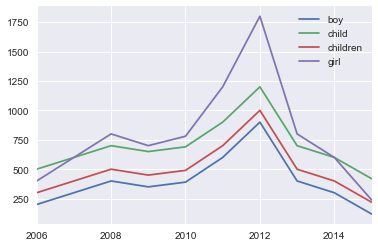

In [185]:
df.plot()

- 与Series对象类似，DataFrame对象可以利用plot()函数直接绘制折线图

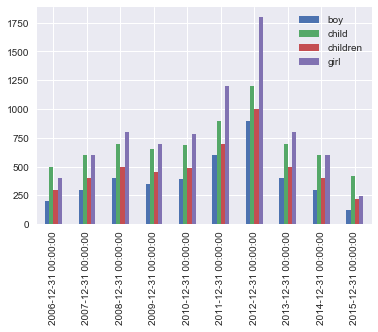

In [186]:
df.plot(kind='bar')

- 绘制柱状图(统计学中一般称为复式柱状图)

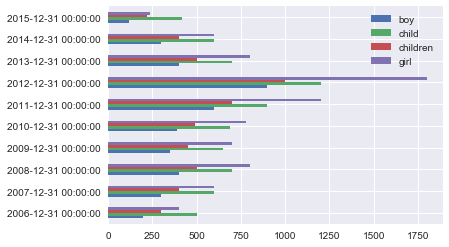

In [187]:
df.plot(kind='barh')

- 绘制条形图

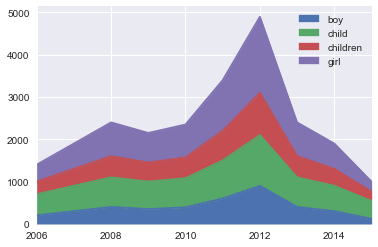

In [188]:
df.plot(kind = 'area')

- 绘制(面积)堆积图

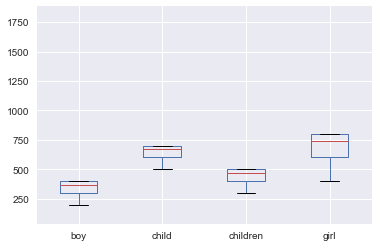

In [189]:
df.plot(kind='box')

- 绘制箱型图

D:\Anaconda\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


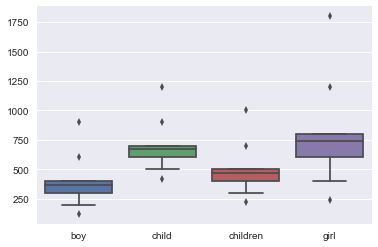

In [190]:
sns.boxplot(df)

- 利用seaborn绘制箱型图

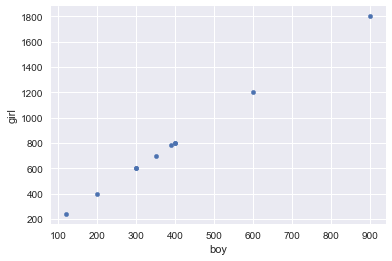

In [191]:
df.plot(kind='scatter', x='boy',y='girl')

- 当plot()函数kind为scatter时，可绘制散点图
- 散点图展现的是2组数据(2个变量)之间的关系
- 可见当前`boy`与`girl`两组数据之间是一种线性关系

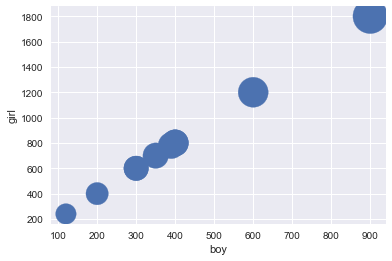

In [192]:
df.plot(kind='scatter', x='boy',y='girl',s=df['child'].values)

- 对散点图，如果设置s参数，将一组list类型的数据传入，代表对应点的大小，则绘制出气泡图
- 气泡图展示的是三组数据(三个变量)之间的关系。上图可以解释为：当男孩数量增加时，女孩增加，同时小孩儿的数量增加。

### 2. DataFrame汇总与描述统计

In [193]:
df.sum()

boy         3960
child       6960
children    4960
girl        7920
dtype: int64

- Series对象的各类求值及描述统计函数，DataFrame对象均可以使用
- 默认参数是axis=0，表示以行方向为数据轴（基准），取每列做为一个Series对象对其进行统计

In [194]:
df.sum(axis=1)

2006-12-31    1400
2007-12-31    1900
2008-12-31    2400
2009-12-31    2150
2010-12-31    2350
2011-12-31    3400
2012-12-31    4900
2013-12-31    2400
2014-12-31    1900
2015-12-31    1000
Freq: A-DEC, dtype: int64

- 参数如果指定axis=1，表示以列方向为数据轴（基准），取每行做为一个Series对象对其进行统计

In [195]:
df.min()

boy         120
child       420
children    220
girl        240
dtype: int32

In [196]:
df.mean()

boy         396.0
child       696.0
children    496.0
girl        792.0
dtype: float64

In [197]:
df.var()

boy          47871.111111
child        47871.111111
children     47871.111111
girl        191484.444444
dtype: float64

In [198]:
df.std()

boy         218.794678
child       218.794678
children    218.794678
girl        437.589356
dtype: float64

In [199]:
df.std()/df.mean()

boy         0.552512
child       0.314360
children    0.441118
girl        0.552512
dtype: float64

In [200]:
df.median()

boy         370.0
child       670.0
children    470.0
girl        740.0
dtype: float64

In [201]:
df.cumsum()

,boy,child,children,girl
2006-12-31,200,500,300,400
2007-12-31,500,1100,700,1000
2008-12-31,900,1800,1200,1800
2009-12-31,1250,2450,1650,2500
2010-12-31,1640,3140,2140,3280
2011-12-31,2240,4040,2840,4480
2012-12-31,3140,5240,3840,6280
2013-12-31,3540,5940,4340,7080
2014-12-31,3840,6540,4740,7680
2015-12-31,3960,6960,4960,7920


In [202]:
df.kurt()

boy         2.680685
child       2.680685
children    2.680685
girl        2.680685
dtype: float64

In [203]:
df.skew()

boy         1.406834
child       1.406834
children    1.406834
girl        1.406834
dtype: float64

In [204]:
df.describe()

,boy,child,children,girl
count,10.000000,10.000000,10.000000,10.000000
mean,396.000000,696.000000,496.000000,792.000000
std,218.794678,218.794678,218.794678,437.589356
min,120.000000,420.000000,220.000000,240.000000
25%,300.000000,600.000000,400.000000,600.000000
50%,370.000000,670.000000,470.000000,740.000000
75%,400.000000,700.000000,500.000000,800.000000
max,900.000000,1200.000000,1000.000000,1800.000000


### 3. 查看DataFrame数据

In [205]:
df.head()

,boy,child,children,girl
2006-12-31,200,500,300,400
2007-12-31,300,600,400,600
2008-12-31,400,700,500,800
2009-12-31,350,650,450,700
2010-12-31,390,690,490,780


In [206]:
df.tail(4)

,boy,child,children,girl
2012-12-31,900,1200,1000,1800
2013-12-31,400,700,500,800
2014-12-31,300,600,400,600
2015-12-31,120,420,220,240


- 与Series类似，一样可以利用head()与tail()查看数据的前几行与后几行。

In [207]:
df.index

DatetimeIndex(['2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

- 查看index属性，index也可称为行索引

In [208]:
df.values

array([[ 200,  500,  300,  400],
       [ 300,  600,  400,  600],
       [ 400,  700,  500,  800],
       [ 350,  650,  450,  700],
       [ 390,  690,  490,  780],
       [ 600,  900,  700, 1200],
       [ 900, 1200, 1000, 1800],
       [ 400,  700,  500,  800],
       [ 300,  600,  400,  600],
       [ 120,  420,  220,  240]])

- 查看values属性，可见DataFrame对象的values是一个numpy的ndarray类型。

In [209]:
df.columns

Index(['boy', 'child', 'children', 'girl'], dtype='object')

- 查看columns属性，columns也可称为列索引。此时列标签是pandas的Index对象，类似list，其中有个三个元素，类型为`object`，在pandas中，非数字类型一般均为object类型。

In [210]:
dft = df.T
dft

,2006-12-31 00:00:00,2007-12-31 00:00:00,2008-12-31 00:00:00,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00
boy,200,300,400,350,390,600,900,400,300,120
child,500,600,700,650,690,900,1200,700,600,420
children,300,400,500,450,490,700,1000,500,400,220
girl,400,600,800,700,780,1200,1800,800,600,240


- 可将DataFrame对象转置。
- 注意，转置并不改变原DataFrame对象，而是新生成一个DataFrame对象。

In [211]:
dft.index

Index(['boy', 'child', 'children', 'girl'], dtype='object')

In [212]:
dft.columns

DatetimeIndex(['2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

- 转置后，index与columns的值互换

In [213]:
df.sort_index(ascending = False) 

,boy,child,children,girl
2015-12-31,120,420,220,240
2014-12-31,300,600,400,600
2013-12-31,400,700,500,800
2012-12-31,900,1200,1000,1800
2011-12-31,600,900,700,1200
2010-12-31,390,690,490,780
2009-12-31,350,650,450,700
2008-12-31,400,700,500,800
2007-12-31,300,600,400,600
2006-12-31,200,500,300,400


- 根据索引进行排序，默认是升序，并对行索引进行排序。定义逐行变化方向为0轴方向：axis=0
- `ascending = False`，使之降序排列

In [214]:
df.sort_index(axis = 1, ascending = False) 

,girl,children,child,boy
2006-12-31,400,300,500,200
2007-12-31,600,400,600,300
2008-12-31,800,500,700,400
2009-12-31,700,450,650,350
2010-12-31,780,490,690,390
2011-12-31,1200,700,900,600
2012-12-31,1800,1000,1200,900
2013-12-31,800,500,700,400
2014-12-31,600,400,600,300
2015-12-31,240,220,420,120


- 将参数axis设为1，排序即按照列索引进行排序

In [215]:
df.sort_values(by='boy')

,boy,child,children,girl
2015-12-31,120,420,220,240
2006-12-31,200,500,300,400
2007-12-31,300,600,400,600
2014-12-31,300,600,400,600
2009-12-31,350,650,450,700
2010-12-31,390,690,490,780
2008-12-31,400,700,500,800
2013-12-31,400,700,500,800
2011-12-31,600,900,700,1200
2012-12-31,900,1200,1000,1800


- 根据值进行排序，如是根据某对应列的值进行排序，需要在参数by中指定数据列索引

### 4. 选择DataFrame数据
**4.1 列选择**

In [216]:
df['boy']

2006-12-31    200
2007-12-31    300
2008-12-31    400
2009-12-31    350
2010-12-31    390
2011-12-31    600
2012-12-31    900
2013-12-31    400
2014-12-31    300
2015-12-31    120
Freq: A-DEC, Name: boy, dtype: int32

- 利用列索引选择一列，将返回该列，且为Series对象。也可以用`df.boy`来访问，效果相同。

In [217]:
df[['boy']]

,boy
2006-12-31,200
2007-12-31,300
2008-12-31,400
2009-12-31,350
2010-12-31,390
2011-12-31,600
2012-12-31,900
2013-12-31,400
2014-12-31,300
2015-12-31,120


- 指定一个列标签，放入list中，可以获取对应colums标签的列，返回DataFrame对象。

In [218]:
df[['boy','children']]

,boy,children
2006-12-31,200,300
2007-12-31,300,400
2008-12-31,400,500
2009-12-31,350,450
2010-12-31,390,490
2011-12-31,600,700
2012-12-31,900,1000
2013-12-31,400,500
2014-12-31,300,400
2015-12-31,120,220


- 利用指定多个列标签colums的list，可以获取对应colums标签的列，返回DataFrame对象。

In [219]:
df[[0,2]]

,boy,children
2006-12-31,200,300
2007-12-31,300,400
2008-12-31,400,500
2009-12-31,350,450
2010-12-31,390,490
2011-12-31,600,700
2012-12-31,900,1000
2013-12-31,400,500
2014-12-31,300,400
2015-12-31,120,220


- 利用代表列整数索引的list，可以获取对应colums标签的列，返回DataFrame对象。

In [220]:
 df.loc[:,'boy']

2006-12-31    200
2007-12-31    300
2008-12-31    400
2009-12-31    350
2010-12-31    390
2011-12-31    600
2012-12-31    900
2013-12-31    400
2014-12-31    300
2015-12-31    120
Freq: A-DEC, Name: boy, dtype: int32

- 也可以利用DataFrame的loc属性进行列选取
- loc属性主要通过标签进行数据选取
- 其中第一个位置参数表示行方向(即axis=0)元素，为`:`即为全部选取
- 第二个位置参数表示列方向(即axis=1)元素，选取当前指定列标签的数据
- 返回一个Series对象

In [221]:
 df.loc[:,['boy']]

,boy
2006-12-31,200
2007-12-31,300
2008-12-31,400
2009-12-31,350
2010-12-31,390
2011-12-31,600
2012-12-31,900
2013-12-31,400
2014-12-31,300
2015-12-31,120


- 与前类似，如在list中指定列标签，则返回一个DataFrame对象

In [222]:
df.loc[:,['boy', 'girl']]

,boy,girl
2006-12-31,200,400
2007-12-31,300,600
2008-12-31,400,800
2009-12-31,350,700
2010-12-31,390,780
2011-12-31,600,1200
2012-12-31,900,1800
2013-12-31,400,800
2014-12-31,300,600
2015-12-31,120,240


- 与前类似，可以选择多个列，返回一个DataFrame对象

In [223]:
df.loc[:,'boy': 'girl']

,boy,child,children,girl
2006-12-31,200,500,300,400
2007-12-31,300,600,400,600
2008-12-31,400,700,500,800
2009-12-31,350,650,450,700
2010-12-31,390,690,490,780
2011-12-31,600,900,700,1200
2012-12-31,900,1200,1000,1800
2013-12-31,400,700,500,800
2014-12-31,300,600,400,600
2015-12-31,120,420,220,240


- 可以利用列索引进行切片选取
- 注意切片是两端包含
- 注意切片不需要在list中

In [224]:
df.iloc[:,0]

2006-12-31    200
2007-12-31    300
2008-12-31    400
2009-12-31    350
2010-12-31    390
2011-12-31    600
2012-12-31    900
2013-12-31    400
2014-12-31    300
2015-12-31    120
Freq: A-DEC, Name: boy, dtype: int32

- 还可以利用DataFrame的iloc属性进行列选取
- iloc属性也称为位置(position)属性，主要通过位置(即对应整数索引)进行数据选取
- 其中第一个位置参数仍然表示行方向(即axis=0)元素，为`:`即为全部选取
- 第二个位置参数仍然表示列方向(即axis=1)元素，选取当前指定列标签的数据
- 返回一个Series对象

In [225]:
df.iloc[:,[1]]

,child
2006-12-31,500
2007-12-31,600
2008-12-31,700
2009-12-31,650
2010-12-31,690
2011-12-31,900
2012-12-31,1200
2013-12-31,700
2014-12-31,600
2015-12-31,420


- 与前类似，如在list中指定列位置，则返回一个DataFrame对象

In [226]:
df.iloc[:,[1,2]]

,child,children
2006-12-31,500,300
2007-12-31,600,400
2008-12-31,700,500
2009-12-31,650,450
2010-12-31,690,490
2011-12-31,900,700
2012-12-31,1200,1000
2013-12-31,700,500
2014-12-31,600,400
2015-12-31,420,220


- 与前类似，可以根据位置选择多个列，返回一个DataFrame对象

In [227]:
df.iloc[:,0:2]

,boy,child
2006-12-31,200,500
2007-12-31,300,600
2008-12-31,400,700
2009-12-31,350,650
2010-12-31,390,690
2011-12-31,600,900
2012-12-31,900,1200
2013-12-31,400,700
2014-12-31,300,600
2015-12-31,120,420


- 与前类似，可以通过列位置进行切片选择多个列，返回一个DataFrame对象

**4.2 行选择**

In [228]:
df.loc[years[0]]

boy         200
child       500
children    300
girl        400
Name: 2006-12-31 00:00:00, dtype: int32

- 利用DataFrame的loc属性也可以进行行选取
- loc属性主要通过标签进行数据选取
- 其中第一个位置参数表示行方向(即axis=0)元素
- 第二个位置参数表示列方向(即axis=1)元素，不指定时，默认为全部选取
- 返回一个Series对象

In [229]:
df.loc[[years[0]]]

,boy,child,children,girl
2006-12-31,200,500,300,400


- 与前类似，如在list中指定行标签，则可选择该行，并返回一个DataFrame对象

In [230]:
df.loc[[years[0], years[2]]]

,boy,child,children,girl
2006-12-31,200,500,300,400
2008-12-31,400,700,500,800


- 与前类似，如在list中指定多个行标签，则可选择多行，并返回一个DataFrame对象

In [231]:
df.loc[years[0]: years[2]]

,boy,child,children,girl
2006-12-31,200,500,300,400
2007-12-31,300,600,400,600
2008-12-31,400,700,500,800


- 与前类似，还可以利用标签切片来选择多行，并返回一个DataFrame对象

In [232]:
df.iloc[0]

boy         200
child       500
children    300
girl        400
Name: 2006-12-31 00:00:00, dtype: int32

- 还可以利用DataFrame的iloc属性进行行选取
- iloc属性也称为位置(position)属性，主要通过位置(即对应整数索引)进行数据选取
- 其中第一个位置参数仍然表示行方向(即axis=0)元素
- 第二个位置参数仍然表示列方向(即axis=1)元素，不指定时，默认为全部选取
- 返回一个Series对象

In [233]:
df.iloc[[0]]

,boy,child,children,girl
2006-12-31,200,500,300,400


- 与前类似，如在list中指定行位置，则返回一个DataFrame对象

In [234]:
df.iloc[[0,1,2]]

,boy,child,children,girl
2006-12-31,200,500,300,400
2007-12-31,300,600,400,600
2008-12-31,400,700,500,800


- 与前类似，可以根据位置选择多个行，返回一个DataFrame对象

In [235]:
df.iloc[1:3]

,boy,child,children,girl
2007-12-31,300,600,400,600
2008-12-31,400,700,500,800


- 与前类似，可以根据位置进行切片选择多个行，返回一个DataFrame对象

In [236]:
df[0:3]

,boy,child,children,girl
2006-12-31,200,500,300,400
2007-12-31,300,600,400,600
2008-12-31,400,700,500,800


- 可以利用行切片，选取多行数据，返回一个DataFrame对象
- 个人觉得容易与选取列数据的混淆，不建议使用

**4.3 选择区块**

**4.3.1 利用loc**

In [237]:
df.loc[years[0],'boy']

200

- 利用loc，可以选择指定行标签、列标签的数据

In [238]:
df.loc[years[0],['boy']]

boy    200
Name: 2006-12-31 00:00:00, dtype: int32

- 利用loc，指定行标签，在list中指定一个列标签，可以选择指定行列的数据
- 返回一个Series

In [239]:
df.loc[[years[0]],['boy']]

,boy
2006-12-31,200


- 利用loc，在list中指定一个行标签，在list中指定一个列标签，可以选择指定行列的数据
- 返回一个DataFrame对象

In [240]:
df.loc[years[0],['boy', 'girl']]

boy     200
girl    400
Name: 2006-12-31 00:00:00, dtype: int32

- 利用loc，指定行标签，在list中指定多个列标签，可以选择指定行的多个列的数据
- 返回一个Series

In [241]:
df.loc[years[0],'boy':'girl']

boy         200
child       500
children    300
girl        400
Name: 2006-12-31 00:00:00, dtype: int32

- 与前类似，还可以切片选择给定行的多列数据
- 返回一个Series

In [242]:
df.loc[[years[0]],'boy':'girl']

,boy,child,children,girl
2006-12-31,200,500,300,400


- 与前类似，但是将返回一个DataFrame对象

In [243]:
df.loc[years[0]:years[2],'boy':'girl']

,boy,child,children,girl
2006-12-31,200,500,300,400
2007-12-31,300,600,400,600
2008-12-31,400,700,500,800


- 行列标签切片，选择对应数据
- 利用loc方式的行与列均可以如上类似处理

**4.3.2 利用iloc**

利用iloc进行区域选择的方式与loc基本类似，只是利用位置而非标签信息进行选取，请参照前面理解

In [244]:
df.iloc[0,0]

200

In [245]:
df.iloc[0,[0,1,2]]

boy         200
child       500
children    300
Name: 2006-12-31 00:00:00, dtype: int32

In [246]:
df.iloc[[0,1,2],0]

2006-12-31    200
2007-12-31    300
2008-12-31    400
Freq: A-DEC, Name: boy, dtype: int32

In [247]:
df.iloc[[0,1,2],[1, 2]]

,child,children
2006-12-31,500,300
2007-12-31,600,400
2008-12-31,700,500


In [248]:
df.iloc[0:2,[1, 2]]

,child,children
2006-12-31,500,300
2007-12-31,600,400


In [249]:
df.iloc[0:5,0:3]

,boy,child,children
2006-12-31,200,500,300
2007-12-31,300,600,400
2008-12-31,400,700,500
2009-12-31,350,650,450
2010-12-31,390,690,490


**4.3.3 利用iat选择单个元素**

In [250]:
df.iat[1,1]

600

- 在以上进行行、列选取的各类方法中，推荐使用loc及iloc方法，虽然稍显繁琐，但是逻辑较为严密，且性能更优。

## 5. 条件选择DataFrame数据(布尔索引)

### 对DataFrame按照条件来选择数据较为方便记忆的方式是：`对象[布尔索引]`，其中对象可以是整个DataFrame对象，也可以是DataFrame经过前一部分选择出的列、行或者区块。注意布尔索引要与选择出的数据对齐。
### 达到数据选择结果的方法较为多样，但为避免造成记忆及使用的混乱，其他条件选择数据的方式本教程不予介绍。

### 5.1 列

In [251]:
df.boy > 400

2006-12-31    False
2007-12-31    False
2008-12-31    False
2009-12-31    False
2010-12-31    False
2011-12-31     True
2012-12-31     True
2013-12-31    False
2014-12-31    False
2015-12-31    False
Freq: A-DEC, Name: boy, dtype: bool

- 与Series中的类似，是每个元素比较后的布尔值
- 返回一个Series

In [252]:
 df[df.boy > 400]

,boy,child,children,girl
2011-12-31,600,900,700,1200
2012-12-31,900,1200,1000,1800


- 可利用DataFrame对象的某一列数据，进行布尔运算，根据布尔运算的结果过滤数据
- 返回一个DataFrame对象

In [253]:
df[(df.boy >300) & (df.girl > 900)]

,boy,child,children,girl
2011-12-31,600,900,700,1200
2012-12-31,900,1200,1000,1800


- 可利用DataFrame对象的多列数据，进行多个布尔运算，注意用括号括起每个部分，表示`and`操作用`&`，'or'用`|`，`not`用`~`。
- 返回一个DataFrame对象

In [254]:
df['girl'][df.boy >300]

2008-12-31     800
2009-12-31     700
2010-12-31     780
2011-12-31    1200
2012-12-31    1800
2013-12-31     800
Freq: A-DEC, Name: girl, dtype: int32

- 选择df中的一列，再根据布尔索引进行过滤选择
- 返回一个Series

In [255]:
df[['girl']][df.boy >300]

,girl
2008-12-31,800
2009-12-31,700
2010-12-31,780
2011-12-31,1200
2012-12-31,1800
2013-12-31,800


- 与前类似，但返回一个DataFrame对象

In [256]:
df[['girl', 'child']][(df.boy >300) & (df.girl > 900)]

,girl,child
2011-12-31,1200,900
2012-12-31,1800,1200


- 选择多列，并用组合的布尔索引进行数据选择

In [257]:
df['girl'].isin([700,800])

2006-12-31    False
2007-12-31    False
2008-12-31     True
2009-12-31     True
2010-12-31    False
2011-12-31    False
2012-12-31    False
2013-12-31     True
2014-12-31    False
2015-12-31    False
Freq: A-DEC, Name: girl, dtype: bool

- 对Series对象应用`isin()`函数，是判断该Series中的values是否在给定的数据表中
- 返回一个都是布尔值的Series

In [258]:
df[df['girl'].isin([700,800])]

,boy,child,children,girl
2008-12-31,400,700,500,800
2009-12-31,350,650,450,700
2013-12-31,400,700,500,800


- 利用isin()函数，选择某列数据进行数据过滤

In [259]:
df[['girl', 'children']][df['girl'].isin([700,800])]

,girl,children
2008-12-31,800,500
2009-12-31,700,450
2013-12-31,800,500


- 选择后利用isin生成的布尔索引进行数据选择

### 5.2 行

- pandas以布尔索引选择行数据的功能至今较弱

In [260]:
df.loc[years[1]]>500

boy         False
child        True
children    False
girl         True
Name: 2007-12-31 00:00:00, dtype: bool

In [261]:
df.loc[years[0]][df.loc[years[1]]>500]

child    500
girl     400
Name: 2006-12-31 00:00:00, dtype: int32

- 但是暂时还无法将以往行对象选择后，应用`对象[行条件]`的方式进行条件数据选取，个人认为是pandas设计没有考虑周全的地方。虽然布尔索引选择行数据的应用场景较少。

In [262]:
df.T[[years[0],years[1]]][df.loc[years[2]]>500].T

,child,girl
2006-12-31,500,400
2007-12-31,600,600


- 如确有需求，可以对DataFrame对象进行转置，然后利用列布尔选择，再转置